<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Statistics Fundamentals, Part 2

_Authors: Alexander Egorenkov (DC)_

---

<a id="learning-objectives"></a>
### Learning Objectives
- Explain the difference between causation and correlation
- Reason about causality and sampling bias using Directed Acyclic Graphs
- Discuss missing data
- Test a hypothesis within a sample case study

### Lesson Guide
- [Data Source](#data-source)
	- [What are the features/covariates/predictors?](#what-are-the-featurescovariatespredictors)
	- [What is the outcome/response?](#what-is-the-outcomeresponse)
	- [What do you think each row in the dataset represents?](#what-do-you-think-each-row-in-the-dataset-represents)
- [Math review](#math-review)
	- [Covariance](#covariance)
	- [Correlation](#correlation)
	- [The variance-covariance matrix](#the-variance-covariance-matrix)
- [Causation and Correlation](#causation-and-correlation)
	- [Structure of causal claims](#structure-of-causal-claims)
	- [Why do we care?](#why-do-we-care)
	- [How do we determine if something is causal?](#how-do-we-determine-if-something-is-causal)
- [Pearlean Causal DAG model](#pearlean-causal-dag-model)
	- [What is a DAG?](#what-is-a-dag)
	- [It's possible that X causes Y.](#its-possible-that-x-causes-y)
	- [Y causes X.](#y-causes-x)
	- [The correlation between X and Y is not statistically significant.](#the-correlation-between-x-and-y-is-not-statistically-significant)
	- [X or Y may cause one or the other indirectly through another variable.](#x-or-y-may-cause-one-or-the-other-indirectly-through-another-variable)
	- [There is a third common factor that causes both X and Y.](#there-is-a-third-common-factor-that-causes-both-x-and-y)
	- [Both X and Y cause a third variable and the dataset does not represent that third variable evenly.](#both-x-and-y-cause-a-third-variable-and-the-dataset-does-not-represent-that-third-variable-evenly)
	- [Controlled Experiments](#controlled-experiments)
	- [When is it OK to rely on association?](#when-is-it-ok-to-rely-on-association)
	- [How does association relate to causation?](#how-does-association-relate-to-causation)
- [Sampling bias](#sampling-bias)
	- [Forms of sampling bias](#forms-of-sampling-bias)
	- [Problems from sampling bias](#problems-from-sampling-bias)
	- [Recovering from sampling bias](#recovering-from-sampling-bias)
- [Missing data](#missing-data)
	- [Types of missing data](#types-of-missing-data)
	- [De minimis](#de-minimis)
- [Introduction to Hypothesis Testing](#introduction-to-hypothesis-testing)
	- [Validate your findings](#validate-your-findings)
- [Scenario](#scenario)
	- [Exercises](#exercises)
	- [Statistical Tests](#statistical-tests)
	- [Interpret your results](#interpret-your-results)


<a id="when-you-come-to-class"></a>
## When you come to class
- Git pull from our course repo and find this notebook in lesson 7
    - Run git status first to make sure there are won't be issue
    - Don't forget to commit your work first
- Recall the definition of the variance estimator
    - Not bias and variance

<a id="data-source"></a>
### Data Source
Today, we’ll use advertising data from an example in An Introduction to Statistical Learning.
- Well known, standard introduction to Machine Learning
- Has a more advanced version, [Elements of Statistical Learning](http://statweb.stanford.edu/~tibs/ElemStatLearn/), if you are comfortable with Linear Algebra and Statistics approaching the grad level

#### Codealong: Bring in Today's data

In [5]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline
plt.style.use('fivethirtyeight')

In [6]:
# read data into a DataFrame
# we use index_col to tell Pandas that the first column in the data has row labels
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


##### Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this new device. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

<a id="what-are-the-featurescovariatespredictors"></a>
### What are the features/covariates/predictors?

In [ ]:
# TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)    
# Radio: advertising dollars spent on Radio
# Newspaper: advertising dollars spent on Newspaper

<a id="what-is-the-outcomeresponse"></a>
### What is the outcome/response?

In [ ]:
# sales of a single product in a given market (in thousands of widgets)

<a id="what-do-you-think-each-row-in-the-dataset-represents"></a>
### What do you think each row in the dataset represents?

In [ ]:
# Every row in the dataset refers to a market has been shown ads

<a id="math-review"></a>
## Math review

<a id="covariance"></a>
### Covariance

Covariance is a measure of the joint variability between two random variables.

You can think of this as a measure of linear association. If you have the variance of Y and the variance of X, the covariance is the amount of variance that they share.

$$cov(X, Y) = \frac {\sum{(x_i - \bar{X})(y_i - \bar{Y})}} {n}$$

Using matrix notation:
$$cov(X, Y) = \mathbb{E}[(X-\mathbb{E}[X])(Y-\mathbb{E}[Y])]$$

A useful special case is:

$$cov(X, X) = var(X) = \sigma_X^2$$

<a id="correlation"></a>
### Correlation

While covariance is a useful measure, it can be difficult to compare covariances because they are not standardized. 

In place, we can use the correlation which measures the same effect, but reports it as a range from -1 to 1. 1 means perfect covariance and correlation, 0 means no correlation, and -1 one means perfect inverse correlation.

$$corr(X,Y) = \frac {cov(X,Y)} {\sigma_X\sigma_Y} = \frac {\mathbb{E}[(X-\mathbb{E}[X])(Y-\mathbb{E}[Y])]} {\sigma_X\sigma_Y}$$

<a id="the-variance-covariance-matrix"></a>
### The variance-covariance matrix

For our purposes in modeling and machine learning, the fastest way to get a preview of the underlying relationships in our data is to use the variance-covariance matrix.

The variance-covariance matrix shows the covariance between every variable in our data.

It looks like this:

$$\left[ \begin{array}{c}
var(x_1,x_1) & cov(x_1,x_2) & ... & cov(x_1,x_n)  \\
cov(x_2,x_1) & var(x_2,x_2) & ... & cov(x_2,x_n)  \\
... & ... & ... & ... \\
cov(x_m,x_1) & cov(x_m,x_2) & ... & var(x_m,x_n)
\end{array} \right]$$

When your data is mean-centered, every column has it's mean subtracted from itself, so the mean for every column is now 0. You can compute the variance-covariance matrix as:

$$\frac {X^TX} {n}$$

Those of you who have been exposed to linear regression may recognize this term.

In [4]:
# Calculate v-cov matrix by de-meaning the data
X = data - data.mean()
X.T.dot(X)/(len(data)-1)

,TV,Radio,Newspaper,Sales
TV,7370.949893,69.862492,105.919452,350.390195
Radio,69.862492,220.427743,114.496979,44.635688
Newspaper,105.919452,114.496979,474.308326,25.941392
Sales,350.390195,44.635688,25.941392,27.221853


In [7]:
# Calculate v-cov matrix by using a built-in method in Pandas
data.cov()

,TV,Radio,Newspaper,Sales
TV,7370.949893,69.862492,105.919452,350.390195
Radio,69.862492,220.427743,114.496979,44.635688
Newspaper,105.919452,114.496979,474.308326,25.941392
Sales,350.390195,44.635688,25.941392,27.221853


In [8]:
# Calculate correlation matrix by using default method
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


When we have a lot of data, the correlation matrix may be too difficult to read. It can help to make a heatmap like below.

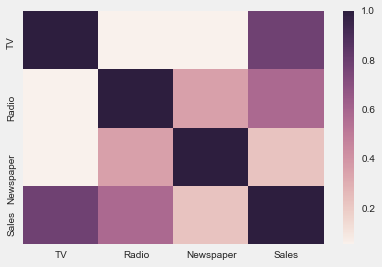

In [11]:
# Create a seaborn heatmap of the correlation matrix
sns.heatmap(data.corr())

Of course, looking at linear association doesn't tell us the whole picture. We can get a more detailed look with a scatter plot matrix.

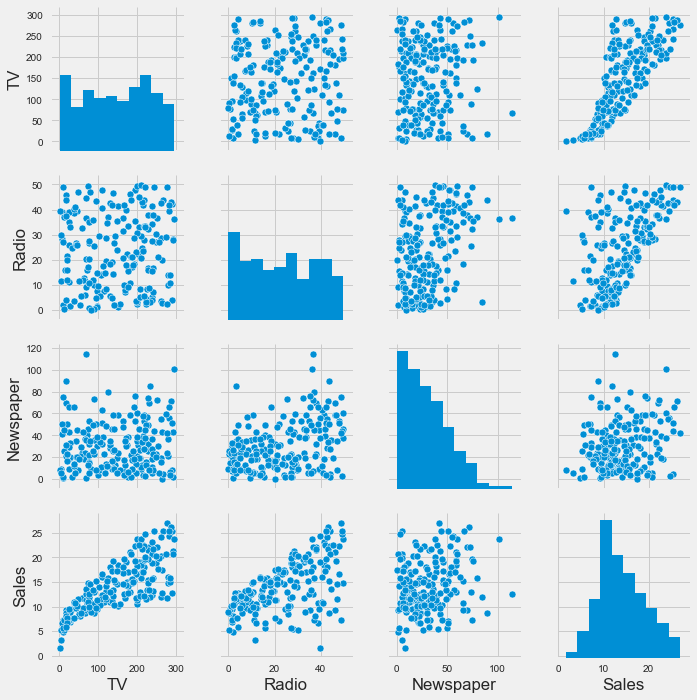

In [9]:
# Create a seaborn pairplot for our data
sns.pairplot(data)

<a id="causation-and-correlation"></a>
## Causation and Correlation
Objective: Explain the difference between causation and correlation

- Think of various examples you’ve seen in the media related to food.
- Causal claims are often inconsistent and contradictory
- [Study links coffee consumption to decreased risk of colorectal cancer](https://news.usc.edu/97761/new-study-links-coffee-consumption-to-decreased-risk-of-colorectal-cancer/)
- [Coffee Does Not Decrease Risk of Colorectal Cancer](http://news.cancerconnect.com/coffee-does-not-decrease-risk-of-colorectal-cancer/)

**Why is this?**
- Sensational headlines?
- There is neglect of a robust data analysis.
- Causal claims and associations are difficult to convey in an unambiguous way

<a id="structure-of-causal-claims"></a>
### Structure of causal claims
- If X happens, Y must happen
- If Y happens, X must have happened 
  - (You need X and something else for Y to happen)
- If X happens, Y will probably happen
- If Y happens, X probably happened

Note: Properties from definition are not causal. If some something is a triangle it is implied that it has three sides. However, it's being a triangle does not cause it to have three sides.

<a id="why-do-we-care"></a>
### Why do we care?
- Understanding this difference is critical in the data science workflow, especially when Identifying and Acquiring data.
- We need to fully articulate our question and use the right data to answer it, including any **confounders**.
- Additionally, this comes up when we Present our results to stakeholders.
- We don’t want to overstate what our model measures.
- Be careful not to say “caused” when you really mean “measured” or “associated”.

<a id="how-do-we-determine-if-something-is-causal"></a>
### How do we determine if something is causal?
Causal criteria is one approach to assessing causal relationships.

However, it’s very hard to define universal causal criteria.

One attempt that is commonly used in the medical field is based on work by Bradford Hill.


He developed a list of “tests” that an analysis must pass in order to indicate a causal relationship:


- Strength of association
- Consistency
- Specificity
- Temporality
- Biological gradient
- Plausibility
- Coherence
- Experiment
- Analogy


**Strength (effect size)**: A small association does not mean that there is not a causal effect, though the larger the association, the more likely that it is causal.

**Consistency (reproducibility)**: Consistent findings observed by different persons in different places with different samples strengthens the likelihood of an effect.

**Specificity**: Causation is likely if there is a very specific population at a specific site and disease with no other likely explanation. The more specific an association between a factor and an effect is, the bigger the probability of a causal relationship.

**Temporality**: The effect has to occur after the cause (and if there is an expected delay between the cause and expected effect, then the effect must occur after that delay).

**Biological gradient**: Greater exposure should generally lead to greater incidence of the effect. However, in some cases, the mere presence of the factor can trigger the effect. In other cases, an inverse proportion is observed: greater exposure leads to lower incidence.

**Plausibility**: A plausible mechanism between cause and effect is helpful (but Hill noted that knowledge of the mechanism is limited by current knowledge).

**Coherence**: Coherence between epidemiological and laboratory findings increases the likelihood of an effect. However, Hill noted that "... lack of such [laboratory] evidence cannot nullify the epidemiological effect on associations".

**Experiment**: "Occasionally it is possible to appeal to experimental evidence".

**Analogy**: The effect of similar factors may be considered.

<a id="pearlean-causal-dag-model"></a>
## Pearlean Causal DAG model
- Visual tool to help us reason about causality and association
- Proposed by Judea Pearl, although there are many similar models
- We will only scratch the surface, so look into other resources if you find this interesting
    - We cover the basic idea and most notable cases
    - We don't talk about the formal mathematics and probability underneath or how to use d-seperation to infer causality

<a id="what-is-a-dag"></a>
### What is a DAG?
- DAG stands for directed acyclic graph, it's a collection of nodes connected by lines. 
- Each line has an arrow to point in a direction.
- If you follow the arrows you reach an end, there are no loops

A single circle or node in a Causal DAG represents an event, something that happens at one point in time.

![](./assets/images/dag1.png)

Let's pretend the random variables X and Y or two different types of events are correlated with each other.

**What are the possible causal structures that will give us this correlation?**
- X causes Y
- Y causes X
- There is no actual correlation
- X or Y indirectly causes the other
- There is a third factor that causes both
- X and Y cause a third factor, but our data collects the third factor unevenly

<a id="its-possible-that-x-causes-y"></a>
### It's possible that X causes Y.
![](./assets/images/x-cause-y.png)

In [ ]:
X = np.random.randn(100)
Y = 5 + 2*X + np.random.randn(100)
dag = pd.DataFrame({'X':X, 'Y':Y})
sns.pairplot(dag);

<a id="y-causes-x"></a>
### Y causes X.
![](./assets/images/y-cause-x.png)

In [ ]:
Y = np.random.randn(100)
X = 5 + 2*Y + np.random.randn(100)
dag = pd.DataFrame({'X':X, 'Y':Y})
sns.pairplot(dag);

<a id="the-correlation-between-x-and-y-is-not-statistically-significant"></a>
### The correlation between X and Y is not statistically significant.
![](./assets/images/xy.png)

In [ ]:
X = np.random.randn(100)
Y = 5 + np.random.randn(100)
dag = pd.DataFrame({'X':X, 'Y':Y})
sns.pairplot(dag);

<a id="x-or-y-may-cause-one-or-the-other-indirectly-through-another-variable"></a>
### X or Y may cause one or the other indirectly through another variable.
![](./assets/images/x-c-z-y.png)

In [ ]:
X = 5 + np.random.randn(100)
Z = X + 0.1*np.random.randn(100)
Y = 3 + Z + np.random.randn(100)

dag = pd.DataFrame({'X':X, 'Y':Y, 'Z':Z})
sns.pairplot(dag);

<a id="there-is-a-third-common-factor-that-causes-both-x-and-y"></a>
### There is a third common factor that causes both X and Y.
![](./assets/images/z-cause-xy.png)

In [ ]:
Z = np.random.randn(100)

X = 5 + 2*Z + np.random.randn(100)
Y = 3 + 3*Z + np.random.randn(100)
common_cause = pd.DataFrame({'X':X, 'Y':Y, 'Z':Z})
sns.pairplot(common_cause);

<a id="both-x-and-y-cause-a-third-variable-and-the-dataset-does-not-represent-that-third-variable-evenly"></a>
### Both X and Y cause a third variable and the dataset does not represent that third variable evenly.

![](./assets/images/xy-causez.png)

In [ ]:
X = 5 + np.random.randn(100)
Y = 3 + np.random.randn(100)
Z = X + Y + 0.1*np.random.randn(100)
common_effect = pd.DataFrame({'X':X, 'Y':Y, 'Z':Z})
sns.pairplot(common_effect[(7 < common_effect['Z']) & (common_effect['Z'] < 8)]);

Generally, recovering the causality structure from a correlation matrix is difficult or impossible. However, thinking through causal effects can give you a much better intuition of your variables and data.

#### What is a confounder?

Let’s say we did an analysis to understand what causes lung cancer. 

We find that people who carry cigarette lighters are 2.4 times more likely to contract lung cancer as people who don’t 
  carry lighters.

Does this mean that the lighters are causing 
  cancer?

As noted before, if lighters and cancer are both caused by smoking, there will be a correlation between lighters and cancer. This isn't the only possible diagram, but it makes the most sense.
![](./assets/images/smoke-lighter-cancer.png)

Conditioning on smoking by only looking at non-smokers, removes the correlation between lighters and cancer if we believe the above structure.

<a id="controlled-experiments"></a>
### Controlled Experiments

- The most fullproof way to measure an effect is to control all the confounders and to directly intervene and control our variable of interest. 
- This way we know that any correlation we find is not due to the confounders, but instead due to the variable we control. 
- This also means that all the effects we see are due to the variable we control.
- However, experiments are not always possible, and take longer to create than using observational data.

<a id="when-is-it-ok-to-rely-on-association"></a>
### When is it OK to rely on association?

- **When any intervention that arises from your model affects only the outcome variable.**
    - In other words, you only need to predict y.
    - This works because we only need to observe explanatory variables and implicitly know what the confounder is doing.
    - Decision making and intervation due to your model are a hidden danger that can shift confounders
    - You can always retrain your model to work with a new set of confounders if they shift.
- **When correlation is causal**
    - If you are sure there are no confounding factors or selection bias, then that association might be a causation (risky)
    - It's OK to exclude confounders that have very unlikely or small effects
    - This is a saving grace. To have a good model you only need variables that correlate with your outcome.
        - Those variables merely need to meaningfully correlate with your outcome.

<a id="how-does-association-relate-to-causation"></a>
### How does association relate to causation?
Most commonly, we find an association between two variables.
- There is an observed correlation between the variables.
- There is an observed correlation in a subset of data
- We find that the descriptive statistics significantly differ in two subsets of the data

We may still not fully understand the causal direction (e.g. does smoking cause cancer or does cancer cause smoking?).
- A causes B, B causes A, or a third factor causes both
    - A and B never cause each other

We also might not understand other factors influencing the association.

Confounding variables often hide the true association between causes and outcomes.

A Directed Acyclic Graph (DAG) can help determine which variables are most important for your model.  It helps visually demonstrate the logic of your models.

A DAG always includes at least one exposure/predictor and one outcome.


#### Codealong: Explore the associations in the advertising data

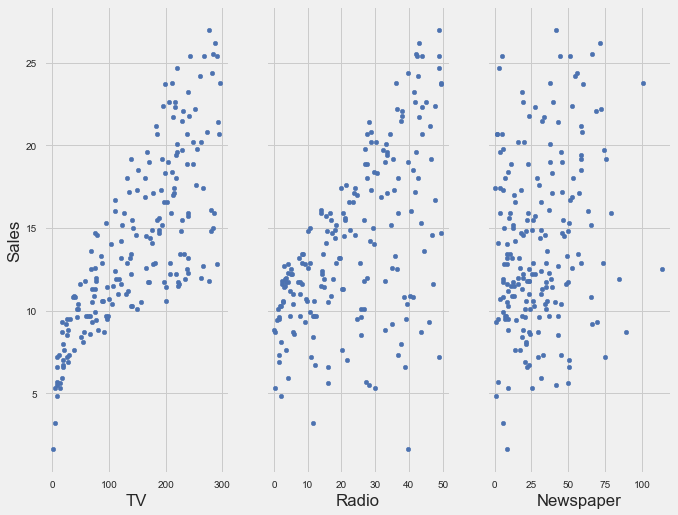

In [15]:
# visualize the relationship between the features and the response using scatterplots
# TV on sales
# Radio on Sales
# Newspaper on Sales
fig, axs = plt.subplots(1,3,sharey=True, figsize=(10,8))
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0])
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

In [16]:
# Create a new column in the DataFrame called squared_Sales that contains the squared values of the Sales column
data['log_TV'] = np.log(data['TV'])

In [17]:
# Check whether log TV has any missing values due to conversion with log
data['log_TV'].isnull().any()

False

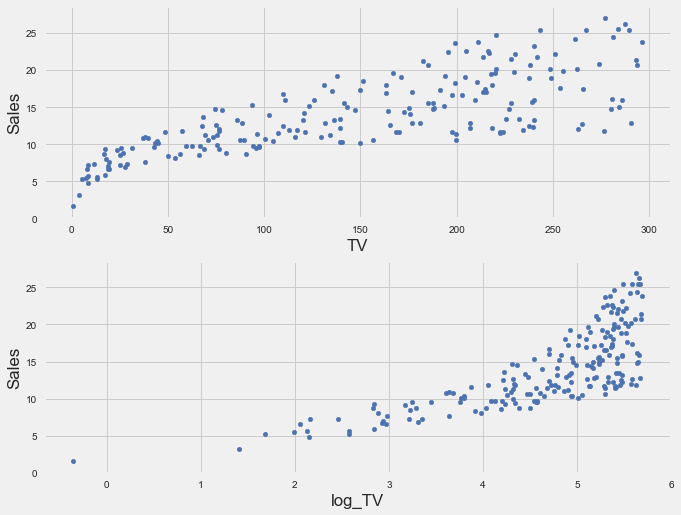

In [18]:
# Plot a scatter plot of TV on Sales and log_TV on Sa1es
fig, axs = plt.subplots(2,1,sharey=True, figsize=(10,8))
data.plot(kind='scatter',x='TV',y='Sales',ax=axs[0])
data.plot(kind='scatter',x='log_TV',y='Sales',ax=axs[1])

**Is there a relationship between ads and sales?**

**Is this a causal relationship?**

**What other questions might we want to know about this data?**

#### Group Exercise (join someone at your table)

Let's say we want to evaluate which type of ad is associated with higher sales.

- Draw a basic DAG on your table or whiteboard 
- Think about other variables that may predict sales.
- Think about confounding causes
- Think about downstream effects changing investement in advertising
- Be ready to share an example

#### Section Highlights

1) The importance of having deep subject area knowledge. You'll develop this over time and it will help you move through your analysis in a logical manner. However, keep in mind that you can show a strong association and still be totally wrong.

2) That a DAG (directed acyclic graph) can be a handy tool for thinking through the logic of your models.

3) The distinction between causation and correlation. In our smoking example, it's relatively obvious that there's a flaw in our logic; however, this won't always be so readily apparent... especially in cutting edge fields where there are many other unknown variables.

4) The importance of good data. Throughout the class we will be working on helping you develop your data intuition, so that you can spot gaps and bias more readily. With this will come a bunch of tools to help you. However, your analysis is only as good as your understanding of the problem and the data

<a id="sampling-bias"></a>
## Sampling bias
Sampling bias is a bias in which a sample is collected in such a way that some members of the intended population are less likely to be included than others.

This can happen when a sample is taken non-randomly whether implicitly or explicitly.

We must be sure not to attribute our results to the process we observe when it is actually do to non-random sampling.

This is conceptually simple, we just aren't measuring what we think we are measuring.

<a id="forms-of-sampling-bias"></a>
### Forms of sampling bias

- **Pre-screening:** Purposely restricting the sample to a specific group or region.
    - This typically happens when people try to study priority areas to save costs and assume priority areas are the same as random areas.
- **Self-selection:** When someone has the ability to non-randomly decide what gets included in our sample.
    - This typically happens in surveys and polls, but can also be an issue with other kinds of reporting.
- **Survivorship bias:** When we select only surving subjects in a sample over time.
    - This might happen when we only look at existing customers and assume they have the same characteristics as new incoming customers.

<a id="problems-from-sampling-bias"></a>
### Problems from sampling bias
- We will over or under estimate means and sample statistics for simple characteristics
- As we've seen from the causal structures using DAGs, it's possible to create the appearance of correlation where there should be none.

<a id="recovering-from-sampling-bias"></a>
### Recovering from sampling bias
- Working out causal DAGs can help you identify when you need to watch out for sample bias
- Generally, it's best to prevent sample bias whenever possible
- We can't really do anything if we ENTIRELY exclude an important group of data
- However, if portions of our data are over or under represented , there are many ways to correct the effect.
    - Typically, we just explicitly model the selection process, which means we need data on factors that determine whether someone participates or not.
    - As with most statistical concepts, this is much easier to deal with in a predictive context.

<a id="missing-data"></a>
## Missing data

Sometimes we wil be unable to collect all attributes for a particular observation. 

Unfortunately, this makes the observation unusable until we decide how to deal with it.

**We have to decide whether to:**
- Drop the observation
- Drop the attribute
- Impute a value for that specific attribute and observation

**How do we decide?**

<a id="types-of-missing-data"></a>
### Types of missing data
- Missing completely at random (MCAR)
    - The reason that the data is missing is completely random and introduces no sampling bias
    - In this case it's very safe to drop or impute
    - We can test for this by looking at other attribute for missing and non-missing groups to see if they match
- Missing at random (MAR)
    - The data is missing in a way that is related to another factor
    - This is a form of sampling bias
    - Like other sampling bias, we can fix this by modeling the selection process
        - This is done by building a model to impute the missing value based on other variables
- Missing not at random (MNAR)
    - The response is missing in a way that relates to its own value
    - We can't test for this
    - We also can't fix this in a reasonable way

<a id="de-minimis"></a>
### De minimis
- If few enough observations are missing, it's not likely to change our results to a meaningful degree.
- In these case, we don't have to bother with trivialities and just pick a method that works well enough.

<a id="introduction-to-hypothesis-testing"></a>
## Introduction to Hypothesis Testing
Objective: Test a hypothesis within a sample case study

You'll remember from last time that we worked on descriptive statistics such as mean and variance. How would we tell if there is a difference between our groups? How would we know if this difference was real or if our finding is simply due to chance?

For example, if we are working on sales data, how would we know if there was a difference between the buying patterns of men and women at Acme Inc? Hypothesis testing!

Note: We generally won't run hypothesis tests in class because we will have a more unified evaluation procedure and generally only use models when they make clear improvements.

##### Hypothesis testing steps
Generally speaking, you start with a null hypothesis and an alternative hypothesis, which is opposite the null. Then, you check whether the data supports rejecting your null hypothesis or fails to reject the null hypothesis.

Note that "failing to reject" the null is not the same as "accepting" the null hypothesis. Your alternative hypothesis may indeed be true, but you don't necessarily have enough data to show that yet.

This distinction is important to help you avoid overstating your findings. You should only state what your data and analysis can truly represent.

Here is an example of a conventional hypothesis test:

    Null hypothesis: There is no relationship between Gender and Sales.
    Alternative hypothesis: There is a relationship between Gender and Sales

<a id="validate-your-findings"></a>
### Validate your findings

##### How do we tell if the association we observed is statistically significant?

Statistical Significance is the likelihood that a result or relationship is caused by something other than mere random chance. Statistical hypothesis testing is traditionally employed to determine if a result is statistically significant or not.

Typically, we use a cut point of 5%. In other words, we say that something is NOT statistically significant if there is a less than 5% chance that our finding was due to chance alone.

A closely related concept is **confidence intervals**. Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows: If the population from which this sample was drawn was **sampled 100 times**, approximately **95 of those confidence intervals** would contain the "true" coefficient.



Keep in mind that we only have a **single sample of data**, and not the **entire population of data**. The "true" coefficient is either within this interval or it isn't, but there's no way to actually know. We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is **probably** within.

Note that using 95% confidence intervals is just a convention. You can create 90% confidence intervals (which will be more narrow), 99% confidence intervals (which will be wider), or whatever intervals you like.


# Class Challenge: A/B Testing Hypothesis tests
Objective: Figure out how to coordinate a small team when answering questions related to documentation, statistics, and a simple application.

<a id="scenario"></a>
## Scenario

You are a data science team working for a web-based company and you are planning to roll out a new site design soon. For random samples of users one of two competing designs were presented and the ultimate purchase total was recorded (if any).

Your task is to determine which of the two designs yields higher total purchases, and if the result is statistically significant.

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

%matplotlib inline
np.random.seed(42)

In [ ]:
# Generate some data and randomize

# Some people bought nothing, the others bought 
# with some distribution
data1 = [0] * 50
data1.extend(np.random.normal(14, 4, 150))
np.random.shuffle(data1)

# The second design hooked less people, 
# but those that were hooked bought more stuff
data2 = [0] * 100
data2.extend(np.random.normal(20, 5, 100))
np.random.shuffle(data2)

# Make a data frame
df = pd.DataFrame()
df["A"] = data1
df["B"] = data2

df.head()

In [ ]:
# Let's plot the data first
plt.hist(df["A"], bins=50, label="A", color=['darkblue'])
plt.ylabel("A counts")
plt.xlabel("Total Purchase")

In [ ]:
# Make the same plot for dataset "B"
plt.hist(df["B"], bins=50, label="B", color=['crimson'])
plt.ylabel("B counts")
plt.xlabel("Total Purchase")

In [ ]:
# Seaborn is also useful
sns.violinplot(data=df)
plt.ylabel("Total Purchase")
sns.plt.show()

In [ ]:
sns.boxplot(data=df)
plt.ylabel("Total Purchase")
sns.plt.show()

<a id="exercises"></a>
### Exercises

**Are our datasets (approximately) normal? Use what we learned in the previous lesson to decide (and a bit of google and docs).**

In [ ]:
# Work out the exercises here

<a id="statistical-tests"></a>
### Statistical Tests

There are a few good statistical tests for A/B testing:
* [ANOVA](https://en.wikipedia.org/wiki/Analysis_of_variance)
* [Welch's t-test](https://en.wikipedia.org/wiki/Welch's_t-test)
* [Mann-Whitney test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test)

**Each test makes various assumptions:**
* ANOVA assumes normal distributions and equal variances in the two data sets
* The Welch t-test assumes normal distributions but not necessarily equal variances, and accounts for small sample sizes better
* The Mann-Whitney test assumes nothing about the distributions but requires at least 20 data points in each set, and produces a weaker p-value

Typically you need to choose the most appropriate test. Tests that make more assumptions are more discriminating (stronger p-values) but can be misleading on data sets that don't satisfy the assumptions.

**Which test is most appropriate for our data? Support your decision.**

In [ ]:
# A:

In [ ]:
# A:

<a id="interpret-your-results"></a>
### Interpret your results
* Is there a significant difference in the mean total purchases in the two designs?
* Which design do you recommend and why? 
* Write two sentences explaining your results and your recommendation.

In [ ]:
# A: